## 미세먼지 데이터 EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re

plt.rc('font',family='Malgun Gothic')

### data 기본적인 전처리 작업

In [3]:
df = pd.read_csv('weather_data/미세먼지_지역별.csv').drop('Unnamed: 0',axis = 1)
df


,날짜,[제주 서귀포시] 강정동,[제주 서귀포시] 남원읍,[제주 서귀포시] 대정읍,[제주 서귀포시] 동홍동,[제주 서귀포시] 성산읍,[제주 제주시] 애월읍,[제주 제주시] 연동,[제주 제주시] 이도동,[제주 제주시] 조천읍,[제주 제주시] 한림읍,[제주 제주시] 화북동
0,2022-11-01,11.0,14.0,20.0,8.0,19.0,NaN,25,24.0,27.0,26,24.0
1,2022-11-02,21.0,23.0,38.0,21.0,46.0,NaN,47,43.0,52.0,48,50.0
2,2022-11-03,11.0,15.0,21.0,11.0,25.0,NaN,22,20.0,31.0,25,21.0
3,2022-11-04,15.0,7.0,11.0,12.0,12.0,NaN,12,10.0,16.0,13,11.0
4,2022-11-05,7.0,4.0,9.0,5.0,9.0,NaN,10,9.0,13.0,12,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
417,2024-01-05,24.0,25.0,23.0,24.0,21.0,25.0,24,21.0,22.0,28,20.0
418,2024-01-06,17.0,24.0,24.0,20.0,24.0,22.0,26,23.0,25.0,24,23.0
419,2024-01-07,11.0,13.0,12.0,13.0,12.0,12.0,15,10.0,13.0,12,10.0
420,2024-01-08,7.0,11.0,7.0,9.0,9.0,6.0,10,6.0,10.0,10,6.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   날짜              422 non-null    object 
 1   [제주 서귀포시]  강정동  421 non-null    float64
 2   [제주 서귀포시]  남원읍  420 non-null    float64
 3   [제주 서귀포시]  대정읍  421 non-null    float64
 4   [제주 서귀포시]  동홍동  419 non-null    float64
 5   [제주 서귀포시]  성산읍  418 non-null    float64
 6   [제주 제주시]  애월읍   359 non-null    float64
 7   [제주 제주시]  연동    422 non-null    int64  
 8   [제주 제주시]  이도동   417 non-null    float64
 9   [제주 제주시]  조천읍   419 non-null    float64
 10  [제주 제주시]  한림읍   422 non-null    int64  
 11  [제주 제주시]  화북동   420 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 39.7+ KB


In [5]:
df['날짜'] = df['날짜'].astype('str') #날짜를 문자로 바꾼 후 날짜 형식으로 바꿀 수 있음
df['날짜'] = pd.to_datetime(df['날짜'])
df['연도']=df['날짜'].dt.year
df['월']=df['날짜'].dt.month
df['일']=df['날짜'].dt.day

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   날짜              422 non-null    datetime64[ns]
 1   [제주 서귀포시]  강정동  421 non-null    float64       
 2   [제주 서귀포시]  남원읍  420 non-null    float64       
 3   [제주 서귀포시]  대정읍  421 non-null    float64       
 4   [제주 서귀포시]  동홍동  419 non-null    float64       
 5   [제주 서귀포시]  성산읍  418 non-null    float64       
 6   [제주 제주시]  애월읍   359 non-null    float64       
 7   [제주 제주시]  연동    422 non-null    int64         
 8   [제주 제주시]  이도동   417 non-null    float64       
 9   [제주 제주시]  조천읍   419 non-null    float64       
 10  [제주 제주시]  한림읍   422 non-null    int64         
 11  [제주 제주시]  화북동   420 non-null    float64       
 12  연도              422 non-null    int32         
 13  월               422 non-null    int32         
 14  일               422 non-null    int32         
dtypes: dat

In [21]:
df.describe() #데이터 파악하기

,날짜,[제주 서귀포시] 강정동,[제주 서귀포시] 남원읍,[제주 서귀포시] 대정읍,[제주 서귀포시] 동홍동,[제주 서귀포시] 성산읍,[제주 제주시] 애월읍,[제주 제주시] 연동,[제주 제주시] 이도동,[제주 제주시] 조천읍,[제주 제주시] 한림읍,[제주 제주시] 화북동,연도,월,일
count,422,421.000000,420.000000,421.000000,419.000000,418.000000,359.000000,422.000000,417.000000,419.000000,422.000000,420.000000,422.000000,422.000000,422.000000
mean,2023-06-05 05:41:13.933649408,12.878860,12.445238,15.004751,12.670644,14.976077,12.339833,16.130332,13.961631,15.250597,15.123223,12.945238,2022.879147,7.116114,15.042654
min,2022-11-01 00:00:00,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,2.000000,1.000000,2022.000000,1.000000,1.000000
25%,2023-02-16 06:00:00,8.000000,7.000000,8.000000,8.000000,9.000000,7.000000,10.000000,8.000000,9.000000,9.000000,7.000000,2023.000000,4.000000,8.000000
50%,2023-06-05 12:00:00,12.000000,10.000000,13.000000,11.000000,13.000000,9.000000,14.000000,11.000000,13.000000,13.000000,10.000000,2023.000000,7.000000,15.000000
75%,2023-09-21 18:00:00,16.000000,15.000000,20.000000,15.000000,18.750000,16.000000,20.000000,17.000000,19.000000,19.000000,16.000000,2023.000000,11.000000,22.000000
max,2024-01-09 00:00:00,49.000000,66.000000,66.000000,49.000000,63.000000,61.000000,61.000000,56.000000,56.000000,60.000000,62.000000,2024.000000,12.000000,30.000000
std,NaN,7.515194,8.155081,9.711308,7.201234,8.752904,8.760714,9.083387,8.683177,9.075005,8.803691,8.873513,0.386336,3.719152,8.586466


In [23]:
df.columns

Index(['날짜', '[제주 서귀포시]  강정동', '[제주 서귀포시]  남원읍', '[제주 서귀포시]  대정읍',
       '[제주 서귀포시]  동홍동', '[제주 서귀포시]  성산읍', '[제주 제주시]  애월읍', '[제주 제주시]  연동',
       '[제주 제주시]  이도동', '[제주 제주시]  조천읍', '[제주 제주시]  한림읍', '[제주 제주시]  화북동',
       '연도', '월', '일'],
      dtype='object')

In [7]:
df = df.rename(columns={'[제주 서귀포시]  강정동':'강정동', '[제주 서귀포시]  남원읍':'남원읍', '[제주 서귀포시]  대정읍':'대정읍',
       '[제주 서귀포시]  동홍동':'동홍동', '[제주 서귀포시]  성산읍':'성산읍', '[제주 제주시]  애월읍':'애월읍', '[제주 제주시]  연동':'연동',
       '[제주 제주시]  이도동':'이도동', '[제주 제주시]  조천읍':'조천읍', '[제주 제주시]  한림읍':'한림읍', '[제주 제주시]  화북동':'화북동'})
df # 컬럼 이름이 복잡하여 컬럼 이름 바꿔줌

,날짜,강정동,남원읍,대정읍,동홍동,성산읍,애월읍,연동,이도동,조천읍,한림읍,화북동,연도,월,일
0,2022-11-01,11.0,14.0,20.0,8.0,19.0,NaN,25,24.0,27.0,26,24.0,2022,11,1
1,2022-11-02,21.0,23.0,38.0,21.0,46.0,NaN,47,43.0,52.0,48,50.0,2022,11,2
2,2022-11-03,11.0,15.0,21.0,11.0,25.0,NaN,22,20.0,31.0,25,21.0,2022,11,3
3,2022-11-04,15.0,7.0,11.0,12.0,12.0,NaN,12,10.0,16.0,13,11.0,2022,11,4
4,2022-11-05,7.0,4.0,9.0,5.0,9.0,NaN,10,9.0,13.0,12,7.0,2022,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2024-01-05,24.0,25.0,23.0,24.0,21.0,25.0,24,21.0,22.0,28,20.0,2024,1,5
418,2024-01-06,17.0,24.0,24.0,20.0,24.0,22.0,26,23.0,25.0,24,23.0,2024,1,6
419,2024-01-07,11.0,13.0,12.0,13.0,12.0,12.0,15,10.0,13.0,12,10.0,2024,1,7
420,2024-01-08,7.0,11.0,7.0,9.0,9.0,6.0,10,6.0,10.0,10,6.0,2024,1,8


In [8]:
columns=['강정동', '남원읍', '대정읍','동홍동', '성산읍', '애월읍', '연동','이도동', '조천읍', '한림읍', '화북동']
df = df.fillna(df.mean()) # 애월읍의 관측소가 나중에 설치되어 관측치가 없는데 그 값을 평균으로 채워줌
df[columns] = df[columns].round(0).astype(int) #모두 소수점 뒤에가 0이라서 실수가 아닌 정수로 모두 바꿔줌
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      422 non-null    datetime64[ns]
 1   강정동     422 non-null    int32         
 2   남원읍     422 non-null    int32         
 3   대정읍     422 non-null    int32         
 4   동홍동     422 non-null    int32         
 5   성산읍     422 non-null    int32         
 6   애월읍     422 non-null    int32         
 7   연동      422 non-null    int32         
 8   이도동     422 non-null    int32         
 9   조천읍     422 non-null    int32         
 10  한림읍     422 non-null    int32         
 11  화북동     422 non-null    int32         
 12  연도      422 non-null    int32         
 13  월       422 non-null    int32         
 14  일       422 non-null    int32         
dtypes: datetime64[ns](1), int32(14)
memory usage: 26.5 KB


In [19]:
df.head(20)

,날짜,강정동,남원읍,대정읍,동홍동,성산읍,애월읍,연동,이도동,조천읍,한림읍,화북동,연도,월,일
0,2022-11-01,11,14,20,8,19,12,25,24,27,26,24,2022,11,1
1,2022-11-02,21,23,38,21,46,12,47,43,52,48,50,2022,11,2
2,2022-11-03,11,15,21,11,25,12,22,20,31,25,21,2022,11,3
3,2022-11-04,15,7,11,12,12,12,12,10,16,13,11,2022,11,4
4,2022-11-05,7,4,9,5,9,12,10,9,13,12,7,2022,11,5
5,2022-11-06,9,7,13,7,14,12,14,13,19,19,13,2022,11,6
6,2022-11-07,12,12,18,11,20,12,22,21,26,26,20,2022,11,7
7,2022-11-08,14,12,17,12,17,12,19,18,23,22,16,2022,11,8
8,2022-11-09,14,14,16,14,20,12,21,21,29,24,23,2022,11,9
9,2022-11-10,16,13,16,14,15,12,23,22,25,25,18,2022,11,10


### 미세먼지 지점별 그림 그리기

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


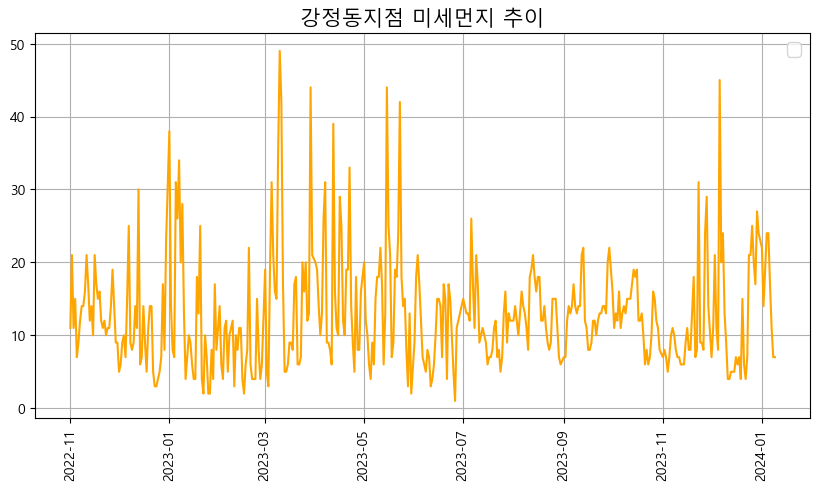

In [25]:
plt.figure(figsize=(10,5)) # 한 지점만 그림그리기
plt.title("강정동지점 미세먼지 추이" , fontsize=15)
plt.plot(df["날짜"], df['강정동'], "-", color='orange')
plt.grid()
plt.legend(fontsize=13)
plt.xticks(rotation=90)
plt.show() 

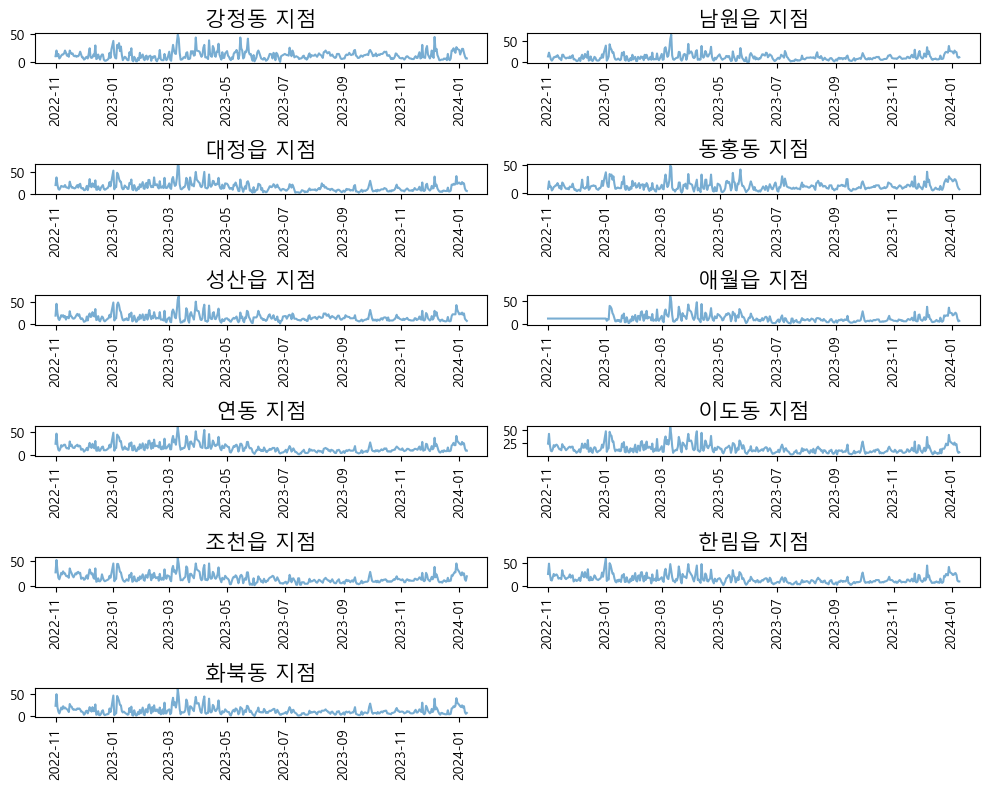

In [22]:
plt.figure(figsize=(10,8)) # 먼저 창을 만들고
n=1
for spot_ in ['강정동', '남원읍', '대정읍', '동홍동', '성산읍', '애월읍', '연동', '이도동', '조천읍', '한림읍','화북동']:
    d_ = df[spot_]
    ax = plt.subplot(6,2,n) # for문을 돌면서 Axes를 추가
    plt.title("%s 지점" % spot_, fontsize=15)
    ax.plot(df["날짜"], d_, "-", label=str(spot_), alpha=.6) # 그래프 추가
    plt.xticks(rotation=90)
    n+=1
plt.tight_layout()  # 창 크기에 맞게 조정
plt.show()